# Chapter 0207. Logistic Regression

**_Linear Regression và Perceptron Learning_**

Các mô hình hình tuyến tính thường dự đoán giá trị output đầu ra dựa vào input đầu vào, các giá trị đầu ra là liên tục đối với mô hình Linear Regression, là rời rạc đối với các bài toán phân lớp. Thuật toán Perceptron Learning và Linear Regression có nét tương tự với nhau. Cùng là một bài toán đi tìm một đường thẳng, nhưng đường thẳng ở Linear Regression dùng để dự đoán giá trị, còn ở Perceptron là để phân chia tập dữ liệu.


Trong PLA, đầu ra chỉ nhận một trong 2 giá trị -1 hoặc 1, phù hợp với bài toán phân lớp nhị phân bằng việc áp dụng hàm xét dấu:
$y_i = sgn(x_i^Tw)$

Trong phần này chúng ta sẽ thảo luận về thuật toán thường dùng trong bài toán phân lớp nhị phân, nhưng với hàm kích hoạt khác đồng thời kết hợp với xác suất. Đó là thuật toán Logistic Regression.

*Chú ý: Tuy là có từ khóa Regression trong tên nhưng Logistic Regression không dùng trong thuật toán hồi quy mà dùng trong các thuật toán phân lớp.*

## Nội dung
1. Đặt vấn đề
2. Xây dựng hàm mất mát
3. Tối ưu hàm mất mát
4. Ví dụ: Bài toán phân biệt hai chữ số viết tay
5. Tính chất của Logistic Regression
6. Logistic Regression trong bài toán phân lớp nhiều lớp
7. Kết luận

## ---------------------------------------------------------------------##-----------------------------------------------------------

## 1. Đặt vấn đề

Trong thuật toán Perceptron Learning thì hàm kích hoạt được chọn là hàm dấu
$$sgn(x) = \begin{align}
    \begin{cases}
        1 \hspace{2cm} if &w^tx > 0\\
        -1 \hspace{2cm} o.w.
    \end{cases}
\end{align}   
$$

Điều này không đúng lắm trong thực tế, xét một ví dụ là thời gian ôn thi của sinh viên và việc đậu rớt của sinh viên trong kỳ thi. Một quan sát thực tiễn là càng ôn nhiều thì càng dễ đậu, tức là xác suất để đậu phụ thuộc vào thời gian ôn thi. Ta chỉ dám khẳng định là `xác suất` chứ không khẳng định chắc chắn được.

Nếu áp dụng Perceptron Learning vào bài toán này thì sẽ không phù hợp. 
- Thứ nhất: không phản ánh đúng hiện thực
- Thứ hai: không thể hiện được mối tương quan giữa thời gian học tập và việc thi đậu.

![Hours Studying](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/71376416_443436716279540_2703227827414630400_n.png?_nc_cat=110&_nc_eui2=AeHOh1J7w0empuvX7j8qpl2qL0RvciTG6FDKXbHTAWYEHLX8hHX9DrdiREh4nQsXApa-Hx-MX2aCY0RoM008_j_w_HTMdGcGCuv26tHRI29Y9w&_nc_oc=AQn7E_K8qQPMWA-dkAbOx5RhR3AGV-rHhpQfoQEH9U6vTqWm_zCL5XrKzSJOv_20fC8&_nc_ht=scontent.fsgn5-3.fna&oh=969a7ac477488f3a58e85ad5055147da&oe=5E3A1CF9)

Nói cách khác dữ liệu trong bài toán này không còn linear seperately nữa. Vì vậy phải thay đổi hàm kích hoạt, các hàm kích hoạt thường được dùng để khắc phục hạn chế ở trên là: 
- Hàm sigmoid
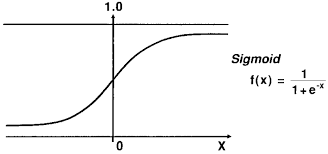

miền giá trị $[0,1]$.


- Hàm tanh
$$tanh(x) = \frac{2}{1+e^{-x}}-1$$

![Tanh Function](https://www.20sim.com/webhelp/tanh_zoom60.jpg)
miền giá trị $[-1,1]$.

**Tại sao các hàm này có thể dùng để khắc phục hạn chế của hàm $sgn(x)$ ?**
- Các hàm này là hàm liên tục nhận giá trị thực, bị chặn trong đoạn nhất định.
- Nếu coi điểm chính giữa của đoạn giá trị($\frac{1}{2}$ đối với hàm $sigmoid$, $0$ đối với hàm $tanh$), các điểm càng xa ngưỡng về phía bên trái thì có giá trị càng nhỏ, các điểm càng xa ngưỡng về phía bên phải thì càng có giá trị càng lớn.
- Các hàm này có đạo hàm tại mọi nơi vì vậy thuận tiên cho viêc tối ưu sau này.

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$
Đặt $\sigma(x) = sigmoid(x)$
Ta có, đạo hàm của hàm sigmoid là:
$$\sigma^{'}(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x))$$


**Với đạo hàm đơn giản, hàm sigmoid được sử dụng rộng rãi trong neural network**.

Ngoài ra còn sử dụng hàm Relu:
$$Re(x) = max(0,x)$$
miền giá trị $[0,x]$.

![Relu function](https://scontent-hkg3-2.xx.fbcdn.net/v/t1.15752-9/72141229_384158982529040_8544920104922513408_n.png?_nc_cat=108&_nc_eui2=AeE96TEDDCOy1J-WCBw3DIpC7xCx90XJx8U7YVu0W91zt5DJ-baSBcD7ALt6EtsEZehiiG-WhHq7ED7Gq2BtcYT_uEk6yaE-uLpggxlOS8xUeg&_nc_oc=AQlkyvM-VBDhEI3m04Bzhg4Z3qqVQkVzGrYxAsTBXrMhnzobhQHf85cKfQPbUNk0Mz0&_nc_ht=scontent-hkg3-2.xx&oh=62e3bc59fee09b58451813c817fa24d4&oe=5E3962D3)

Tham khảo:
![Activation Function](https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png)

## 2. Xây dựng hàm mất mát

Với mô hình sử dụng hàm kích hoạt(activation function) là hàm $sigmoid$ thì ta có thể giả sử rằng xác suất để một điểm dữ liệu $x$ rơi vào lớp thứ nhất là $f(w^Tx)$ và rơi vào lớp còn lại là $1 - f(w^Tx)$, với
$$p(y_i=1|x_i;w)=f(w^Tx_i)$$
$$p(y_i=0|x_i;w)=1-f(w^Tx)_i$$

**Mục đích cuối cùng là tìm tham số $w$ của mô hình, sao cho các điểm dữ liệu ứng với nhãn $y_i$, $f(w^Tx_i)$ càng gần 1, và ngược lại**. 

Kí hiệu $z_i = f(w^Tx_i)$, hai biểu thức trên có thể viết lại dưới dạng:
$$p(y_i|x_i;w) = z^{y_i}_i(1-z_i)^{1-y_i}$$

Xét toàn bộ dữ liệu training set với ma trận dữ liệu $X = [x_1,x_2,x_3,...,x_N] \in R^{d\times N}$ và vector đầu ra tương ứng với một cột $y = [y_1,y_2,y_3,...,y_N]$. Ta cần giải bài toán tối ưu:
### $$w= argmax\hspace{1mm}p(y|X;w)$$

Đây chính là bài toán **maximum likelihood estimation(`MLE`)** với tham số mô hình $w$ cần được ước lượng. Giả sử rằng các điểm dữ liệu được sinh ra một các ngẫu nhiên độc lập với nhau, ta có thể viết:
$$p(y|X;w) = \prod_{i=1}^N \hspace{1mm}p(y_i|x_i;w) = \prod_{i=1}^N \hspace{1mm}z_i^{y_i}(1-z_i)^{1-y_i}$$

Lấy Logarit tự nhiên, đổi dấu, và lấy trung bình, ta thu được hàm số:
### $$J(w) = -\frac{1}{N}log\hspace{1mm}p(y|X;w) = -\frac{1}{N}\Sigma_{i=1}^N(y_ilog z_i+(1-y_i)log(1-z_i))$$

với chú ý rằng $z_i$ là một hàm số của $w$ và $x_i$. Hàm số này chính là **hàm mất mát(lost function)** của logistic regression. Ta đi tìm $w$ để $J(w)$ đạt giá trị nhỏ nhất(Tại sao nhỏ nhất ?)

## 3. Tối ưu hàm mất mát

**Bài toán tối ưu hàm mất mát của Logistic Regression có thể được giải quyết bằng Stochastic Gradient Descent(SGD). Tại mỗi vòng lặp, $w$ sẽ được cập nhật dựa trên mỗi điểm dữ liệu ngẫu nhiên.** 

Hàm mất mát của logistic regression với chỉ một điểm dữ liệu $(x_i,y_i)$ và đạo hàm của nó lần lượt là:
### $$J(w;x_i,y_i) = -(y_ilog(z_i)+(1-y_i)log(1-z_i))$$

$$\nabla _wJ(w;x_i,y_i) = -(\frac{y_i}{z_i}-\frac{1-y_i}{1-z_i})(\nabla_wz_i) = \frac{z_i-y_i}{z_i(1-z_i)}(\nabla_w z_i)$$

## Toán học chỗ này hơi khó nhai - Bổ sung sau

với C là một hằng số. Đơn giản chọn C = 0, ta được $z = f(w^Tx) = \sigma(s)$. Đây chính là lý do hàm sigmoid được ra đời. Logistic Regression với hàm kích hoạt là Logistic Regression. Khi nói logistic regression, ta ngầm hiểu rằng đó chính là logistic sigmoid regression.

Thay vào công thức xxx vào công thức yyy, ta được:
### $$\nabla \hspace{1mm}J(w;x_i,y_i) = (z_i-y_i)x_i = (\sigma(w_Tx_i)-y_i)x_i$$

**Và công thức cập nhật nghiệm cho Logistic sigmoid regression sử dụng SGD** là:
### $$w \leftarrow w - \eta(z_i-y_i)x_i = w - \eta(\sigma(w^Tx_i) - y_i)x_i$$

với $\eta$ là learning rate($\eta>0$).

## 4. Ví dụ: Bài toán phân biệt hai chữ số viết tay

Chúng ta cùng làm bài toán thực tế để chứng minh lý thuyết toán khá nặng ở trên không chỉ là lý thuyết nhé. Bài toán này là bài toán phân biệt hai chữ số 0 và 1 trong bộ cơ sở dữ liệu MNIST. Chúng ta sẽ sử dụng class `LogisticRegression` trong thư viện `scikit-learn`.

### *Chuẩn bị thư viện và dữ liệu*

In [ ]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
mnist = fetch_mldata('MNIST original', data_home='../../data/')
N, d = mnist.data.shape

Có tổng cộng 70000 điểm dữ liệu trong tập dữ liệu MNIST, mỗi điểm là một mảng 784 phần tử tương ứng với 784 pixel. Mỗi chữ số từ 0 đến 9 chiếm khoảng 10%. Chúng ta sẽ lấy ra tất cả các điểm ứng với chữ số 0 và 1, sau đó lấy ra ngẫu nhiên 2000 điểm làm test set, phần còn lại đóng vai trò training set.

In [ ]:
X_all = mnist.data
y_all = mnist.target

X0 = X_all[np.where(y_all == 0)[0]] # all digit 0
X0 = X_all[np.where(y_all == 1)[0]] # all digit 0
y0 = np.zeros(X0.shape[0]) # class 0 label
y1= np.ones(X1.shape[0]) # class 1 label

X = np.concatenate((X0, X1), axis=0) # All digits
y = np.concatenate((y0, y1)) # All labels

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000)

### *Training Model*

Tiếp theo, ta xây dựng mô hình logistic regression trên test set và dự đoán nhãn của các điểm trong test set. Kết quả này được so sánh với nhãn thật của mỗi điểm dữ liệu để tính độ chính xác của bộ phân lớp trên tập kiểm thử.

In [ ]:
model = LogisticRegression(C = 1e5) # C is inverse of lam
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

### *Testing Model*

Tiếp theo, ta cùng đi tìm những ảnh bị phân loại sai và hiển thị chúng.

In [ ]:
mis = np.where((y_pred - y_test) !=0)[0]
Xmis = X_test[mis, :]

from display_network import *
filename = ’mnist_mis.pdf’

with PdfPages(filename) as pdf:
    plt.axis(’off’)
    A = display_network(Xmis.T, 1, Xmis.shape[0])
    f2 = plt.imshow(A, interpolation=’nearest’ )
    plt.gray()
    pdf.savefig(bbox_inches=’tight’)
    plt.show()

Đọc thêm bài toán xác định giới tính dựa trên ảnh khuôn mặt tại https://goo.gl/9V8wdD.

## 5. Tính chất của Logistic Regression

### Logistic Regression được dùng nhiều trong các bài toán Classification

Mặc dù trong tên có từ Regression, Logistic Regression được sử dụng nhiều trong các bài toán Classification. Sau khi tìm được tham số cho mô hình, việc xác định class y cho một điểm dữ liệu x được xác định bằng việc so sánh hai biểu thức xác suất:
$$P(y=1|x;w); \hspace{3mm} P(y=0|x;w)$$

Nếu một biểu thức thứ nhất lơn hơn, ta kết luận dữ liệu thuộc class 1, và ngược lại. Vì tổng hai biểu thức này luôn bằng 1 nên một cách nhanh hơn để xác định class mà điểm dữ liệu thuộc về là xem giá trị $P(y=1|x;w)$ lớn hơn 0.5 hay không.

### *Đường ranh giới tạo bởi Logistic Regression là một siêu phằng*

Giả sử những điểm có xác suất đầu ra lớn hơn 0.5 được coi là thuộc vào lớp có nhãn là 1. Tập hợp các điểm này là nghiệm của bất phương trình:
$$P(y=1|x;w) > 0.5 \Leftrightarrow \frac{1}{1+e^{-w^Tx}}>0.5 \Leftrightarrow e^{-w^Tx} < 1 \Leftrightarrow w^Tx>0$$

Nói cách khắc, tập các điểm thuộc lớp 1 tạo thành nữa không gian(halfspace) $w^Tx>0$, tập hợp các điểm thuộc lớp 0 tạo thành nữa không gian còn lại. Ranh giới chính là siêu phằng $w^Tx$.

**Chính vì ranh giới siêu phẳng này nên Logistic Regression được xếp vào bộ lớp tuyến tính**.

### *Logistic Regression không yêu cầu giả thuyết linearly seperable*

Một điểm cộng của logistic regression so với PLA là nó không cần có giả thuyết dữ liệu hai lớp phải phân biệt rạch ròi. Tuy nhiên, ranh giới tìm được vẫn có dạng tuyến tính. Vì vậy, mô hình này chỉ phù hợp với loại dữ liệu mà hai lớp gần linearly seperable, tức chỉ có một vài điểm dữ liệu phá vỡ tính linearly seperable của hai lớp.

### *Ngưỡng ra quyết định có thể thay đổi*

### Biểu diễn theo Neural Network

Khi biểu diễn theo Neural Network, linear regression, PLA, logistic regression được biểu diễn như dưới đây. Sự khác nhau chẳng qua là ở hàm kích hoạt

![PLA, Logistic, linear Regression](https://scontent.fsgn5-5.fna.fbcdn.net/v/t1.15752-9/72474501_377199736489380_5939811934961401856_n.png?_nc_cat=108&_nc_oc=AQlcy3888FgpIMLfvwN0zI0rTqPAAJQr2clmmMhyGgOFhjbSOn9NR68oMRIFognrcQg&_nc_ht=scontent.fsgn5-5.fna&oh=6d04f09a1eb5e37d869328e28b643ec2&oe=5E2263B2)

## 6. Logistic Regression trong bài toán phân lớp nhiều lớp

Có một vấn đề đặt ra là một bài toán thực tế thường có nhiều class ở được dự đoán ở đầu ra, chứ không chỉ hai class như các bài toán trên. **Với một vài kĩ thuật nhỏ, ta có thể áp dụng logistic regression để áp dụng vào bài toán phân lớp đa lớp này**.

Theo như đọc sách thì có ít nhất 4 cách để áp dụng logistic regression hay các bộ phân lớp nhị phân vào các bài toán phân lớp đa lớp.

![](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/72711375_2381821325467253_182801612073336832_n.png?_nc_cat=111&_nc_oc=AQkCadA9cCdad4jIG7UADgzZrNC1JSRANiA6_7lA4eSEmBmkdChouNLvFHuB7TBPIJQ&_nc_ht=scontent.fsgn5-3.fna&oh=ce28245d6907ee27a475bc2ed71ab737&oe=5E1E0EDB)

### *One - vs - one*

Xây dựng rất nhiều các bộ phân lớp nhị phân cho từng cặp hai lớp dữ liệu. Bộ thứ nhất phân lớp thứ nhất và thứ hai, bộ thứ hai phân biệt lớp thứ 2 với lớp thứ 3, ... Dữ liệu mới được đưa vào tất cả các bộ phân lớp nhị phân nêu trên. Kết quả cuối cùng có thể được xác định bằng cách xem lớp nào mà điểm dữ liệu được phân vào nhiều nhất. Hoặc với Logistic Regression thì ta có thể lấy tổng các xác suất mà điểm dữ liệu rơi vào mỗi lớp. Như vậy, nếu có $C$ lớp thì số phân lớp cần dùng là $C_n^2 = \frac{C(C-1)}{2}$. Đây là một con số lớn(độ phức tạp $O(n^2)$, cách làm này không thuận lợi cho việc tính toán. Hơn nữa, nếu một chữ số thực ra là chữ số 1, nhưng lại đưa vào bộ phân lớp giữa các chữ số 5 và 6, thì cả hai khả năng này đều không hợp lý.

![One-vs-One](https://image.slidesharecdn.com/linearmodelsandmulticlassclassification2-170312171304/95/linear-models-and-multiclass-classification-25-638.jpg?cb=1489338888)

### *Phân tầng*

Cách làm như one-vs-one sẽ mất nhiều thơì gian huấn luyện vì có quá nhiều bộ phân lớp nhị phân được xây dựng. Một cách giúp giảm số bộ phân lớp nhị phân là phân tầng(**hierachical**).

Ý tưởng của phương pháp này được mô tả qua ví dụ sau:

Giả sử ra có bài toán phân lớp 4 chữ số $4, 5, 6, 7$ trong MNIST. Vì chữ số 4 và 7 khá giống nhau, chữ số 5 và 6 khá giống nhau nên trước tiên ta xây dựng bộ phân lớp $[4.7]$ vs $[5,6]$. Sau đó xây dựng thêm hai bộ phân lớp 4 vs 7 và 5 vs 6. Tổng cộng, ta cần 3 bộ phân lớp. Chú ý rằng có nhiều cách chia khác nhau, ví dụ $[4, 5, 6]$ vs $7, [4,5]$ vs $6$, rồi $4$ vs $5$. Ưu điểm của phương pháp này là giảm nhược điểm của phương pháp one-vs-one. **Nhưng lại có một ngược điểm là chỉ cần một bộ phân lớp cho kết quả sai thì kết quả cuối cùng chắc chắn sai.**

[]()

### *Binary coding*

Có một số cách giảm số Binary Classifier hơn nữa là Binary Coding, tức là mã hóa output của mỗi lớp bằng một số nhị phân.

**Ví dụ**: Nếu 4 lớp dữ liệu thì các lớp được mã hóa là $00, 01, 10, 11$. Với cách làm này, số bộ phân lớp nhị phân cần xây dựng chỉ là $m =\ceil {log_2(C)}$, trong đó C là số lớp, $\ceil {a}$ là số nguyên nhỏ nhất không nhỏ hơn a. Bộ thứ nhất đi tìm bit đầu tiên của output(đã được mã hóa nhị phân), bộ thứ hai sẽ đi tìm bit thứ hai, v.v... Cách làm này sử dụng một số lượng nhỏ nhất các bộ phân lớp tuyến tính.

Tuy nhiên, nó có một hạn chế rất lớn là chỉ cần một bit bị phân loại sai sẽ dẫn đến dữ liệu bị phân lớp sai. Hơn nữa, nếu số lớp không là lũy thừa của 2, mã nhị phân nhận được có thể là một giá trị không tương ứng với lớp nào.

### *one - vs - rest hay one-hot coding*

**Kĩ thuật được sử dụng nhiều nhất là `one-vs-rest`** (một số tài liệu gọi là one-vs-all, one-against-rest, hoặc one-against-all). Cụ thể, nếu có C lớp thì ta sẽ xây dựng C bộ phân lớp nhị phân, mỗi bộ tương ứng với một lớp. Bộ thứ nhất giúp phân biệt lớp thứ nhất với các lớp còn lại, tức xem điểm dữ liệu này thuộc lớp thứ nhất hay không, hoặc xác suất để một điểm rơi vào lớp đó là bao nhiêu. Tương tự như thế, bộ phân lớp thứ 2 sẽ phân biệt lớp thứ hai với các lớp còn lại, ... Kết quả cuối cùng có thể xác định được bằng cách xác định lớp mà một điểm rơi vào với xác suất cao nhất.

![one-vs-rest](https://1.bp.blogspot.com/-cEz0wkXUPmA/WLJq3e6CDAI/AAAAAAAAFX4/Wramg-8qC_QH13K0qosnPAbvccXdbBU-ACLcB/s1600/VQvgVUs%255B1%255D.png)

## 7. Kết luận

Đến đây, chúng ta đã biết thêm được 1 thuật toán trong chuỗi các bài toán Neural Network, đó là Logistic Regression. Đây là một thuật toán xây dựng một mô hình tuyến tính dựa trên hàm kích hoạt(activation function) là một hàm phi tuyến(thường là hàm sigmoid). Cùng với đó là việc mở rộng Logistic Regression cho bài toán phân lớp đa lớp bằng một vài kĩ thuật, trong đó kĩ thuật one-vs-rest được dùng nhiêu nhất.

Trong phần sau chúng ta vẫn tiếp tục tìm hiểu một thuật toán trong Neural Network nữa, đó là Softmax Regression.